In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Resources/Data/combined_data.csv')
data.head()

,Unnamed: 0,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,0.0,97.0,97.0,0.1,4245.39744,5479531.0,0.9,0.8,0.893,17.0
1,1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,0.0,93.0,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
2,2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,0.0,97.0,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
3,3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,0.0,92.0,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
4,4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,0.0,95.0,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7


In [17]:
data.rename(columns = {'Unnamed: 0':'country_id'}, inplace = True)
data.head(200)

,country_id,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,0.0,97.0,97.0,0.1,4245.397440,5479531.0,0.900000,0.800000,0.893,17.0
1,1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,0.0,93.0,93.0,0.1,5314.644160,5683483.0,1.100000,0.900000,0.923,19.2
2,2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,0.0,97.0,97.0,0.1,8989.842400,8282396.0,0.400000,0.300000,0.938,16.0
3,3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,0.0,92.0,92.0,0.1,5734.443600,33815.0,1.000000,0.900000,0.919,19.0
4,4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,0.0,95.0,95.0,0.1,7455.246540,518867.0,0.800000,0.700000,0.948,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,...,21.0,47.0,47.0,4.4,348.381417,45461.0,8.200000,8.200000,0.347,7.1
151,151,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,...,15.0,99.0,98.0,0.4,71.348397,11629553.0,5.700000,5.700000,0.493,10.8
152,152,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,...,32.0,88.0,87.0,6.2,118.693830,15777451.0,5.600000,5.500000,0.507,10.3
153,153,South Sudan,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,...,39.0,41.0,31.0,3.4,758.725782,11882136.0,4.493103,4.494483,0.421,4.9


In [18]:
data.columns

Index(['country_id', 'Country', 'Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Happiness (Dystopia)', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling'],
      dtype='object')

In [19]:
 # Assign the data to X and y

X = data[['country_id', 'Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling']]
y = data["Happiness (Dystopia)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(155, 29) (155, 1)


In [20]:
 # Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [21]:
 # Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [22]:
 # Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


Text(0.5, 1.0, 'Residual Plot')

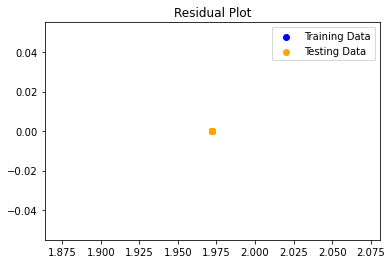

In [23]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [24]:
 Text(0.5,1,'Residual Plot')
    

NameError: name 'Text' is not defined